In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Set up
import sys

sys.path.append("/home/dchen/BA_CH_EN/")

# Basics
import tensorflow as tf
import xarray as xr

# Helpful
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *  # CRPS metrics
from src.utils.data_split import *  # Splitting data into X and y
from src.utils.drn_make_X_array import *  # Import make train array functions (make_X_array)
from src.models.EMOS import *  # EMOS implementation
from src.models.DRN.DRN_model import *  # DRN implementation
from src.models.DRN.DRN_load_preds import *
from src.models.EMOS_local.EMOS_local_load_preds import *  # Load EMOS_global_preds
from src.models.EMOS_global.EMOS_global_load_score import *  # Load EMOS_global_scores
from src.models.EMOS_global.EMOS_global_load_preds import *  # Load EMOS_global_preds
from src.models.EMOS_global.EMOS_global_load_model import *  # Load EMOS_global_models
import data.raw.load_data_raw as ldr  # Load raw data
import data.processed.load_data_processed as ldp  # Load processed data normed
import data.processed.load_data_processed_denormed as ldpd  # Load processed data denormed
from src.models.CRPS_baseline.CRPS_load import *  # Load CRPS scores

<IPython.core.display.Javascript object>

### 1. Load scores

In [5]:
eq_crps = xr.open_dataset("/mnt/sda/Data2/fourcastnet/data/results/eq_crps.h5")

land_sea_mask_global = np.load(
    "/mnt/sda/Data2/fourcastnet/data/stats_v0/land_sea_mask.npy"
)

<IPython.core.display.Javascript object>

### Visualize smaller/larger map

In [12]:
img_x_subset_small = slice(110, 230)
img_y_subset_small = np.append(np.arange(1370, 1440), np.arange(0, 60))

<IPython.core.display.Javascript object>

In [13]:
lat_subset_large = slice(60, 220)
lon_subset_large = np.append(np.arange(1390, 1440), np.arange(0, 170))

<IPython.core.display.Javascript object>

In [14]:
land_sea_mask_small = land_sea_mask_global[img_x_subset_small, img_y_subset_small]
land_sea_mask_large = land_sea_mask_global[lat_subset_large, lon_subset_large]

<IPython.core.display.Javascript object>

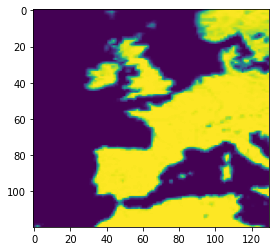

<IPython.core.display.Javascript object>

In [15]:
plt.imshow(land_sea_mask_small)

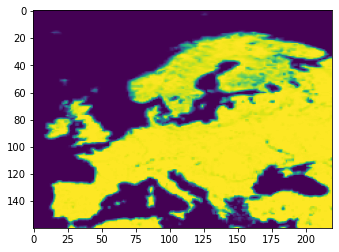

<IPython.core.display.Javascript object>

In [16]:
plt.imshow(land_sea_mask_large)